In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
 
from datetime import datetime
start_time = datetime.now()

In [2]:
# df = pd.read_excel('F://UCSI_research\PG_Matters\Chan Kok Pin\post-viva\Dataset\Regression_data\Tablet_online\Tablet1.xlsx')
df = pd.read_excel('F://UCSI_research\PG_Matters\Chan Kok Pin\post-viva\Dataset\Regression_data\Tablet_online\Tablet1_snv.xlsx')

# 
X = df.iloc[: , 1:]
Y = df.iloc[:, 0]


# print(len(Y))
# print(len(X))
print(X.shape)
print(Y.shape)

(310, 404)
(310,)


Text(0.5, 0, 'Active substance (%)')

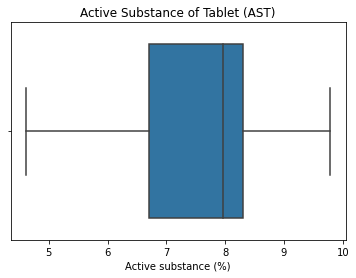

In [3]:
df.head(5)
sns.boxplot(x=df["Y"])
plt.title("Active Substance of Tablet (AST)")
plt.xlabel('Active substance (%)')

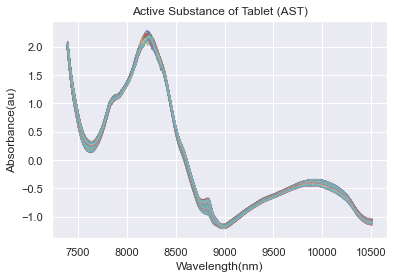

In [4]:
 #add print spectrum...
import seaborn as sns
sns.set_theme()

X1 = df.values[:, 1:].astype('float32')  
y_toc = df.values[:,0]    
wl = np.linspace(7398,10507, num=X1.shape[1], endpoint=True)   #wavelength range
plt.plot(wl,X1.T)
plt.title('Active Substance of Tablet (AST)', fontsize = 12)
plt.xlabel(r'Wavelength(nm)', fontsize=12)
plt.ylabel('Absorbance(au)', fontsize=12)
plt.savefig('AST tablet.png', dpi=300)
plt.show()

In [5]:
#train set,test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)  

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(232, 404)
(232,)
(78, 404)
(78,)


In [7]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
LGB=lgb.LGBMRegressor(verbose=0)

In [8]:
# #tuning   hyperparameters
paramsDT={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
paramsRF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


paramsLGB={'n_estimators':[100,200,300,400,500], 'learning_rate':[0.25,0.5,0.75, 1],'reg_alpha':[0,0.01,0.05,0.1]}


# TUNING DT

In [9]:
DT1 = RandomizedSearchCV(estimator = DT, param_distributions = paramsDT, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

DT1.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],


In [10]:
best_DT = DT1.best_estimator_
print(best_DT)


DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1,
                      splitter='random')


In [11]:
# train the model with its best paramaters
best_DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [12]:
dt_p1 = best_DT.predict(X_train)
dt_p2 = best_DT.predict(X_test)
print('DT result')
print('train R^2: %.2f' % r2_score(Y_train, dt_p1))
print('train MAE: %.2f' % mean_absolute_error(Y_train, dt_p1))
print('test  R^2: %.2f' % r2_score(Y_test, dt_p2))
print('test  MAE: %.2f' % mean_absolute_error(Y_test, dt_p2))

DT result
train R^2: 0.92
train MAE: 0.28
test  R^2: 0.91
test  MAE: 0.31


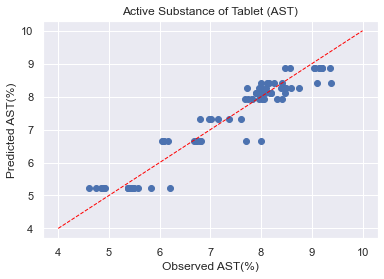

In [13]:
# plot prediction
sns.set_theme()
plt.scatter(Y_test,dt_p2)
x=np.linspace(4,10,10)
y=x
plt.plot(x,y,color='red',linewidth=1.0,linestyle='--',label='line')
#plt.legend(["y = x","predict"])
 
plt.title("Active Substance of Tablet (AST)")
plt.xlabel('Observed AST(%)')
plt.ylabel('Predicted AST(%)')
plt.savefig('AST-graph.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# TUNING LGBM

In [14]:
LGB1 = RandomizedSearchCV(estimator = LGB, param_distributions = paramsLGB, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

LGB1.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.5, 0.75, 1],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.05, 0.1]},
                   random_state=0, verbose=3)

In [15]:
best_LGB = LGB1.best_estimator_
print(best_LGB)


LGBMRegressor(learning_rate=0.5, n_estimators=200, reg_alpha=0.1, verbose=0)


In [16]:
# train the model with its best paramaters
best_LGB.fit(X_train, Y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

LGBMRegressor(learning_rate=0.5, n_estimators=200, reg_alpha=0.1, verbose=0)

In [17]:
lgb_p1 = best_LGB.predict(X_train)
lgb_p2 = best_LGB.predict(X_test)
print('LGBM result')
print('train R^2: %.2f' % r2_score(Y_train, lgb_p1))
print('train MAE: %.2f' % mean_absolute_error(Y_train, lgb_p1))
print('test  R^2: %.2f' % r2_score(Y_test, lgb_p2))
print('test  MAE: %.2f' % mean_absolute_error(Y_test, lgb_p2))
print('test  RMSE: %.2f' %  sqrt(mean_squared_error(Y_test, lgb_p2)))

LGBM result
train R^2: 1.00
train MAE: 0.01
test  R^2: 0.94
test  MAE: 0.22
test  RMSE: 0.31


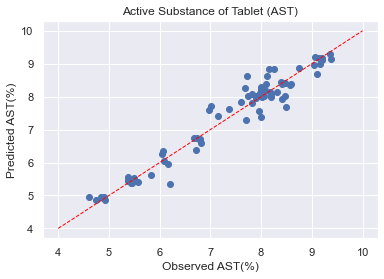

In [18]:
plt.scatter(Y_test,lgb_p2)
x=np.linspace(4,10,10)
y=x
plt.plot(x,y,color='red',linewidth=1.0,linestyle='--',label='line')
#plt.legend(["y = x","predict"])
 
plt.title("Active Substance of Tablet (AST)")
plt.xlabel('Observed AST(%)')
plt.ylabel('Predicted AST(%)')
plt.savefig('AST-graph.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# TUNING RF

In [19]:
RF1 = RandomizedSearchCV(estimator = RF, param_distributions = paramsRF, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

RF1.fit(X_train, Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=0, verbose=3)

In [20]:
best_RF = RF1.best_estimator_
print(best_RF)

RandomForestRegressor(bootstrap=False, max_depth=85, max_features='sqrt',
                      min_samples_split=5, n_estimators=800)


In [21]:
# train the model with its best paramaters
best_RF.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=85, max_features='sqrt',
                      min_samples_split=5, n_estimators=800)

In [22]:
rf_p1 = best_RF.predict(X_train)
rf_p2 = best_RF.predict(X_test)
print('RF result')
print('train R^2: %.2f' % r2_score(Y_train, rf_p1))
print('train MAE: %.2f' % mean_absolute_error(Y_train, rf_p1))
print('test  R^2: %.2f' % r2_score(Y_test, rf_p2))
print('test  MAE: %.2f' % mean_absolute_error(Y_test, rf_p2))
print('test  RMSE: %.2f' %  sqrt(mean_squared_error(Y_test, rf_p2)))

RF result
train R^2: 1.00
train MAE: 0.02
test  R^2: 0.96
test  MAE: 0.20
test  RMSE: 0.27


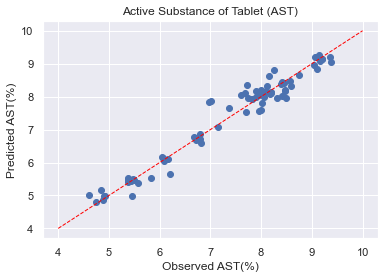

In [23]:
plt.scatter(Y_test,rf_p2)
x=np.linspace(4,10,10)
y=x
plt.plot(x,y,color='red',linewidth=1.0,linestyle='--',label='line')
#plt.legend(["y = x","predict"])
 
plt.title("Active Substance of Tablet (AST)")
plt.xlabel('Observed AST(%)')
plt.ylabel('Predicted AST(%)')
plt.savefig('AST-graph.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

In [24]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:30.110094
